## A dive into the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df = pd.read_csv('customer_booking.csv', encoding='latin-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


Convert binary columns from int to bool

In [3]:
bool_cols = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'booking_complete']
df[bool_cols] = df[bool_cols].astype('bool')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  bool   
 10  wants_preferred_seat   50000 non-null  bool   
 11  wants_in_flight_meals  50000 non-null  bool   
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  bool   
dtypes: bool(4), float64(1), int64(4), object(5)
memory usa

In [5]:
df['flight_duration'].sample(5)

15102    8.58
47160    6.62
8256     8.83
44492    6.62
39350    6.62
Name: flight_duration, dtype: float64

In [6]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,True,False,False,5.52,False
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,False,False,False,5.52,False
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,True,True,False,5.52,False
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,False,False,True,5.52,False
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,True,False,True,5.52,False


In [7]:
# Selecting only columns with object data type
categorical_columns = df.select_dtypes(include=['object']).columns

# Looping through each categorical column to find unique elements
for column in categorical_columns:
    unique_elements = df[column].nunique()
    print(f"Number of unique elements in '{column}': {unique_elements}")

Number of unique elements in 'sales_channel': 2
Number of unique elements in 'trip_type': 3
Number of unique elements in 'flight_day': 7
Number of unique elements in 'route': 799
Number of unique elements in 'booking_origin': 104


In [8]:
# Print unique elements of categorical variables with less than 5 unique features
for column in df.select_dtypes(include=['object']).columns:
    unique_count = df[column].nunique()
    if unique_count < 10:
        print(f"Unique elements in '{column}': {df[column].unique()}")

Unique elements in 'sales_channel': ['Internet' 'Mobile']
Unique elements in 'trip_type': ['RoundTrip' 'CircleTrip' 'OneWay']
Unique elements in 'flight_day': ['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']


In [9]:
df['booking_origin'].sample(5)

20785      Australia
24285    South Korea
48559      Australia
16992      Indonesia
43209      Indonesia
Name: booking_origin, dtype: object

In [10]:
df['route'].sample(5)

38699    HNDKNO
43837    CTSDMK
43728    COKMEL
45968    HGHLGK
42328    AKLKUL
Name: route, dtype: object

In [11]:
df['purchase_lead'].sample(7)

28900     97
2633      47
870      110
38295    183
7847       7
11802    159
24102     42
Name: purchase_lead, dtype: int64

In [12]:
df['flight_duration'].sample(5)

30216    6.62
49834    4.67
5268     5.62
7738     8.83
40614    4.67
Name: flight_duration, dtype: float64

In [13]:
# Descriptive statistics of flight_duration column
flight_duration_stats = df['flight_duration'].describe()

# Print descriptive statistics
print(flight_duration_stats)

# Check the distribution of flight_duration values
flight_duration_values = df['flight_duration'].unique()

# Sort and print unique values
flight_duration_values_sorted = sorted(flight_duration_values)
print(f"Unique flight duration values: {flight_duration_values_sorted}")

count    50000.000000
mean         7.277561
std          1.496863
min          4.670000
25%          5.620000
50%          7.570000
75%          8.830000
max          9.500000
Name: flight_duration, dtype: float64
Unique flight duration values: [4.67, 4.72, 4.75, 4.83, 5.0, 5.07, 5.13, 5.33, 5.52, 5.62, 6.33, 6.42, 6.62, 7.0, 7.42, 7.57, 8.15, 8.58, 8.67, 8.83, 9.5]


Convert days into hours for `purchase_lead` and `length of stay`

In [14]:
# Define conversion factors
hours_in_day = 24

# Convert time-related columns to hours
df['purchase_lead_hours'] = df['purchase_lead'] * hours_in_day
df['length_of_stay_hours'] = df['length_of_stay'] * hours_in_day

# Drop the original columns
df.drop(columns=['purchase_lead', 'length_of_stay'], inplace=True)

# Print first few rows to verify the changes
print(df.head())

   num_passengers sales_channel  trip_type  flight_hour flight_day   route  \
0               2      Internet  RoundTrip            7        Sat  AKLDEL   
1               1      Internet  RoundTrip            3        Sat  AKLDEL   
2               2      Internet  RoundTrip           17        Wed  AKLDEL   
3               1      Internet  RoundTrip            4        Sat  AKLDEL   
4               2      Internet  RoundTrip           15        Wed  AKLDEL   

  booking_origin  wants_extra_baggage  wants_preferred_seat  \
0    New Zealand                 True                 False   
1    New Zealand                False                 False   
2          India                 True                  True   
3    New Zealand                False                 False   
4          India                 True                 False   

   wants_in_flight_meals  flight_duration  booking_complete  \
0                  False             5.52             False   
1                  False  

Since hours of the day have a cyclical nature, you can encode flight_hour using trigonometric functions like sine and cosine. This transformation can capture the periodicity of time features and prevent issues such as treating 23:00 and 00:00 as far apart. The technique transforms the hour of the day into two continuous variables, which represent the cyclic pattern of time.

In [15]:
# Perform periodic encoding for flight_hour
df['flight_hour_sin'] = np.sin(2 * np.pi * df['flight_hour'] / hours_in_day)
df['flight_hour_cos'] = np.cos(2 * np.pi * df['flight_hour'] / hours_in_day)

# Drop the original column
# df.drop(columns=['flight_hour'], inplace=True)

# Print first few rows to verify the changes
print(df.head())

   num_passengers sales_channel  trip_type  flight_hour flight_day   route  \
0               2      Internet  RoundTrip            7        Sat  AKLDEL   
1               1      Internet  RoundTrip            3        Sat  AKLDEL   
2               2      Internet  RoundTrip           17        Wed  AKLDEL   
3               1      Internet  RoundTrip            4        Sat  AKLDEL   
4               2      Internet  RoundTrip           15        Wed  AKLDEL   

  booking_origin  wants_extra_baggage  wants_preferred_seat  \
0    New Zealand                 True                 False   
1    New Zealand                False                 False   
2          India                 True                  True   
3    New Zealand                False                 False   
4          India                 True                 False   

   wants_in_flight_meals  flight_duration  booking_complete  \
0                  False             5.52             False   
1                  False  

Normalize the time-related columns to ensure they're on the same scale.

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
columns_to_normalize = ['purchase_lead_hours', 'length_of_stay_hours', 'flight_duration']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Print first few rows to verify the changes
print(df.head())


   num_passengers sales_channel  trip_type  flight_hour flight_day   route  \
0               2      Internet  RoundTrip            7        Sat  AKLDEL   
1               1      Internet  RoundTrip            3        Sat  AKLDEL   
2               2      Internet  RoundTrip           17        Wed  AKLDEL   
3               1      Internet  RoundTrip            4        Sat  AKLDEL   
4               2      Internet  RoundTrip           15        Wed  AKLDEL   

  booking_origin  wants_extra_baggage  wants_preferred_seat  \
0    New Zealand                 True                 False   
1    New Zealand                False                 False   
2          India                 True                  True   
3    New Zealand                False                 False   
4          India                 True                 False   

   wants_in_flight_meals  flight_duration  booking_complete  \
0                  False         0.175983             False   
1                  False  

In [17]:
# Specify the number of top categories to display
top_n = 5

# Calculate the counts of each category in 'booking_origin'
booking_origin_counts = df['booking_origin'].value_counts().head(top_n)

# Calculate the counts of each category in 'route'
route_counts = df['route'].value_counts().head(top_n)

# Display the top N most frequent categories and their counts for 'booking_origin'
print("Top", top_n, "most frequent categories in 'booking_origin':")
print(booking_origin_counts)

# Display the top N most frequent categories and their counts for 'route'
print("\nTop", top_n, "most frequent categories in 'route':")
print(route_counts)


Top 5 most frequent categories in 'booking_origin':
booking_origin
Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Name: count, dtype: int64

Top 5 most frequent categories in 'route':
route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
Name: count, dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   flight_hour            50000 non-null  int64  
 4   flight_day             50000 non-null  object 
 5   route                  50000 non-null  object 
 6   booking_origin         50000 non-null  object 
 7   wants_extra_baggage    50000 non-null  bool   
 8   wants_preferred_seat   50000 non-null  bool   
 9   wants_in_flight_meals  50000 non-null  bool   
 10  flight_duration        50000 non-null  float64
 11  booking_complete       50000 non-null  bool   
 12  purchase_lead_hours    50000 non-null  float64
 13  length_of_stay_hours   50000 non-null  float64
 14  flight_hour_sin        50000 non-null  float64
 15  fl

In [19]:
df.head()

,num_passengers,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,purchase_lead_hours,length_of_stay_hours,flight_hour_sin,flight_hour_cos
0,2,Internet,RoundTrip,7,Sat,AKLDEL,New Zealand,True,False,False,0.175983,False,0.302191,0.024422,0.965926,-0.258819
1,1,Internet,RoundTrip,3,Sat,AKLDEL,New Zealand,False,False,False,0.175983,False,0.129181,0.025707,0.707107,0.707107
2,2,Internet,RoundTrip,17,Wed,AKLDEL,India,True,True,False,0.175983,False,0.280277,0.028278,-0.965926,-0.258819
3,1,Internet,RoundTrip,4,Sat,AKLDEL,New Zealand,False,False,True,0.175983,False,0.110727,0.039846,0.866025,0.500000
4,2,Internet,RoundTrip,15,Wed,AKLDEL,India,True,False,True,0.175983,False,0.078431,0.028278,-0.707107,-0.707107


##   FEATURE COMBINATION

Create interaction features by combining related variables. For example, we can create features like "wants_extra_baggage_and_preferred_seat" or "wants_meals_and_preferred_seat" to capture combinations of customer preferences. simply multiply the boolean columns representing individual preferences. This will result in a new binary column where a value of 1 indicates that both preferences are true, and a value of 0 indicates that at least one preference is false.

In [20]:
# Create new features for combinations of customer preferences
df['wants_extra_baggage_and_preferred_seat'] = df['wants_extra_baggage'] & df['wants_preferred_seat']
df['wants_meals_and_preferred_seat'] = df['wants_in_flight_meals'] & df['wants_preferred_seat']
df['wants_extra_baggage_and_meals'] = df['wants_extra_baggage'] & df['wants_in_flight_meals']
df['wants_all_services'] = df['wants_extra_baggage'] & df['wants_preferred_seat'] & df['wants_in_flight_meals']
df['wants_seat_and_meals_but_no_baggage'] = (df['wants_preferred_seat'] & df['wants_in_flight_meals']) & ~df['wants_extra_baggage']
df['wants_baggage_and_meals_but_no_seat'] = (df['wants_extra_baggage'] & df['wants_in_flight_meals']) & ~df['wants_preferred_seat']
df['wants_baggage_and_seat_but_no_meals'] = (df['wants_extra_baggage'] & df['wants_preferred_seat']) & ~df['wants_in_flight_meals']


In [21]:
print(df.head())

   num_passengers sales_channel  trip_type  flight_hour flight_day   route  \
0               2      Internet  RoundTrip            7        Sat  AKLDEL   
1               1      Internet  RoundTrip            3        Sat  AKLDEL   
2               2      Internet  RoundTrip           17        Wed  AKLDEL   
3               1      Internet  RoundTrip            4        Sat  AKLDEL   
4               2      Internet  RoundTrip           15        Wed  AKLDEL   

  booking_origin  wants_extra_baggage  wants_preferred_seat  \
0    New Zealand                 True                 False   
1    New Zealand                False                 False   
2          India                 True                  True   
3    New Zealand                False                 False   
4          India                 True                 False   

   wants_in_flight_meals  ...  length_of_stay_hours  flight_hour_sin  \
0                  False  ...              0.024422         0.965926   
1       

define and map `flight_day`

In [22]:
# Define the mapping of days to integers
day_mapping = {'Mon': 1.0, 'Tue': 2.0, 'Wed': 3.0, 'Thu': 4.0, 'Fri': 5.0, 'Sat': 6.0, 'Sun': 7.0}

# Map the 'flight_day' column using the day_mapping dictionary
df['flight_day_encoded'] = df['flight_day'].map(day_mapping)

# Verify that the encoding matches the defined mapping
print(df[['flight_day', 'flight_day_encoded']].sample(6))


      flight_day  flight_day_encoded
23272        Sun                 7.0
27039        Thu                 4.0
1033         Sun                 7.0
11896        Thu                 4.0
14265        Fri                 5.0
13222        Fri                 5.0


Check time of the day and preferences

In [23]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'purchase_lead_hours', 'length_of_stay_hours',
       'flight_hour_sin', 'flight_hour_cos',
       'wants_extra_baggage_and_preferred_seat',
       'wants_meals_and_preferred_seat', 'wants_extra_baggage_and_meals',
       'wants_all_services', 'wants_seat_and_meals_but_no_baggage',
       'wants_baggage_and_meals_but_no_seat',
       'wants_baggage_and_seat_but_no_meals', 'flight_day_encoded'],
      dtype='object')

In [25]:
def categorize_time_of_day(time):
    hour = int(time.split(':')[0])
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Convert integer values to string representations of time
df['flight_hour_str'] = df['flight_hour'].astype(str)

# Apply categorize_time_of_day function
df['time_of_day_preference'] = df['flight_hour_str'].apply(categorize_time_of_day)

# Ordinal encoding
time_of_day_mapping = {'Morning': 1, 'Afternoon': 2, 'Evening': 3}
df['time_of_day_preference_encoded'] = df['time_of_day_preference'].map(time_of_day_mapping)

# Drop after use
df.drop(columns=['flight_hour_str'], inplace=True)

In [26]:
# Create 'is_weekend_flight' feature based on 'flight_day'
df['is_weekend_flight'] = df['flight_day_encoded'].apply(lambda x:  1 if x >=  6 else  0)

In [34]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'purchase_lead_hours', 'length_of_stay_hours',
       'flight_hour_sin', 'flight_hour_cos',
       'wants_extra_baggage_and_preferred_seat',
       'wants_meals_and_preferred_seat', 'wants_extra_baggage_and_meals',
       'wants_all_services', 'wants_seat_and_meals_but_no_baggage',
       'wants_baggage_and_meals_but_no_seat',
       'wants_baggage_and_seat_but_no_meals', 'flight_day_encoded',
       'time_of_day_preference', 'time_of_day_preference_encoded',
       'is_weekend_flight'],
      dtype='object')

/home/lawi/.conda/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


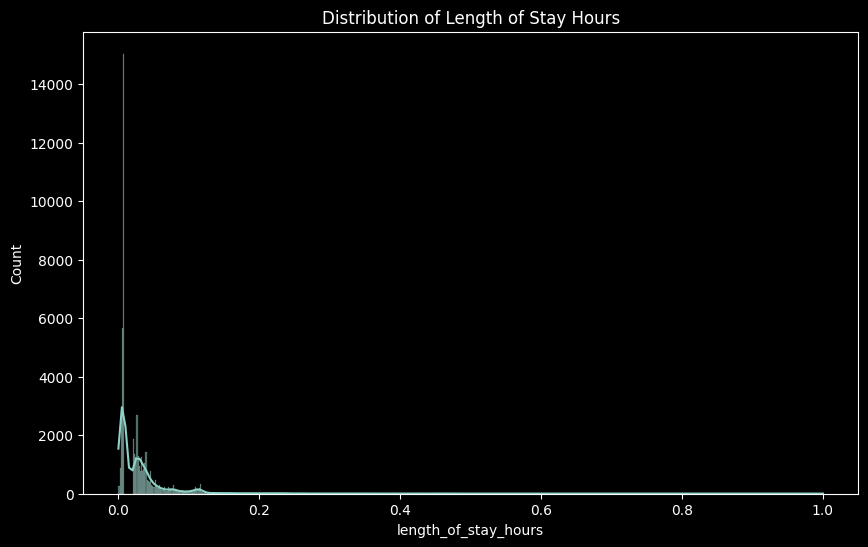

/home/lawi/.conda/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


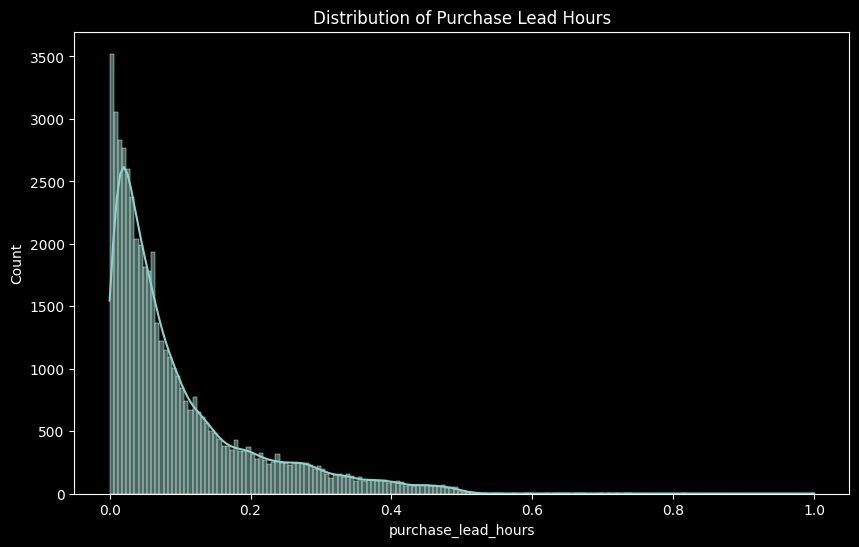

In [35]:
# Convert inf values to NaN before operating

df['length_of_stay_hours'] = df['length_of_stay_hours'].replace([np.inf, -np.inf], np.nan)
df['purchase_lead_hours'] = df['purchase_lead_hours'].replace([np.inf, -np.inf], np.nan)

# Histogram for 'length_of_stay_hours'
plt.figure(figsize=(10,   6))
sns.histplot(data=df, x='length_of_stay_hours', kde=True)
plt.title('Distribution of Length of Stay Hours')
plt.show()

# Histogram for 'purchase_lead_hours'
plt.figure(figsize=(10,   6))
sns.histplot(data=df, x='purchase_lead_hours', kde=True)
plt.title('Distribution of Purchase Lead Hours')
plt.show()

Create buckets for 'length_of_stay_hours' and 'purchase_lead_hours' to categorize stays into short, medium, long, etc. This can help simplify the model and potentially reveal patterns related to stay durations.
Create interaction terms between 'length_of_stay_hours' and 'purchase_lead_hours' to capture the combined effect of these two variables.
Sometimes, the ratio of two variables can be informative.the ratio of the length of stay to the purchase lead time might indicate how quickly a customer books a flight relative to their stay duration.
The difference between the two variables might also be a useful feature, especially if you're interested in how much time a customer spends on the website before making a booking compared to their actual stay.

In [36]:
df['length_of_stay_category'] = pd.cut(df['length_of_stay_hours'], bins=[0,  24,  48, np.inf], labels=['Short', 'Medium', 'Long'])
df['purchase_lead_time_category'] = pd.cut(df['purchase_lead_hours'], bins=[0,  24,  48,  72, np.inf], labels=['Immediate', 'Within  24 Hours', 'Within  168 Hours', 'More Than  168 Hours'])
# create interaction terms between 'length_of_stay_hours' and 'purchase_lead_hours' to capture the combined effect of these two variables.
df['length_of_stay_times_purchase_lead'] = df['length_of_stay_hours'] * df['purchase_lead_hours']
df['length_over_lead_ratio'] = df['length_of_stay_hours'] / df['purchase_lead_hours']
df['length_minus_lead_diff'] = df['length_of_stay_hours'] - df['purchase_lead_hours']


In [37]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'purchase_lead_hours', 'length_of_stay_hours',
       'flight_hour_sin', 'flight_hour_cos',
       'wants_extra_baggage_and_preferred_seat',
       'wants_meals_and_preferred_seat', 'wants_extra_baggage_and_meals',
       'wants_all_services', 'wants_seat_and_meals_but_no_baggage',
       'wants_baggage_and_meals_but_no_seat',
       'wants_baggage_and_seat_but_no_meals', 'flight_day_encoded',
       'time_of_day_preference', 'time_of_day_preference_encoded',
       'is_weekend_flight', 'length_of_stay_category',
       'purchase_lead_time_category', 'length_of_stay_times_purchase_lead',
       'length_over_lead_ratio', 'length_minus_lead_diff'],
      dtype='object')

Attempting to analyse geographical data, route and country.

combining 'booking_origin' and 'sales_channel' 
Analyze the relationship between the newly created feature and binary columns.
Calculate summary statistics (e.g., mean, median) of binary columns for each category in the interaction feature.

In [38]:
# Concatenate 'booking_origin' and 'sales_channel' to form a new categorical feature
df['booking_origin_sales_channel'] = df['booking_origin'] + "_" + df['sales_channel']

In [39]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'purchase_lead_hours', 'length_of_stay_hours',
       'flight_hour_sin', 'flight_hour_cos',
       'wants_extra_baggage_and_preferred_seat',
       'wants_meals_and_preferred_seat', 'wants_extra_baggage_and_meals',
       'wants_all_services', 'wants_seat_and_meals_but_no_baggage',
       'wants_baggage_and_meals_but_no_seat',
       'wants_baggage_and_seat_but_no_meals', 'flight_day_encoded',
       'time_of_day_preference', 'time_of_day_preference_encoded',
       'is_weekend_flight', 'length_of_stay_category',
       'purchase_lead_time_category', 'length_of_stay_times_purchase_lead',
       'length_over_lead_ratio', 'length_minus_lead_diff',
       'booking_origin_sales_channel'],
      dtype='object')

In [40]:
# # Compare binary columns with the interaction feature
# sns.barplot(x='booking_origin_sales_channel', y='wants_extra_baggage', data=df, estimator=sum)
# plt.xticks(rotation=45)
# plt.show()

Perform statistical tests to determine if there are significant differences in binary column values across different categories of the interaction feature.

In [48]:
from scipy.stats import chi2_contingency

# List of features to compare with 'booking_origin_sales_channel'
features_to_compare = [
    'wants_extra_baggage_and_preferred_seat',
    'wants_meals_and_preferred_seat',
    'wants_extra_baggage_and_meals',
    'wants_all_services',
    'wants_seat_and_meals_but_no_baggage',
    'wants_baggage_and_meals_but_no_seat',
    'wants_baggage_and_seat_but_no_meals',
    'wants_extra_baggage',
    'wants_preferred_seat',
    'wants_in_flight_meals',
    'is_weekend_flight'
]

# Perform chi-squared test for independence

for feature in features_to_compare:
    contingency_table = pd.crosstab(df['booking_origin_sales_channel'], df[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Feature: {feature}\nChi-squared test statistic: {chi2}\np-value: {p}\n")


Feature: wants_extra_baggage_and_preferred_seat
Chi-squared test statistic: 899.3854256383029
p-value: 2.259557644569116e-106

Feature: wants_meals_and_preferred_seat
Chi-squared test statistic: 922.7726504627188
p-value: 1.2868658651831398e-110

Feature: wants_extra_baggage_and_meals
Chi-squared test statistic: 1268.5705149461444
p-value: 2.315766935470825e-175

Feature: wants_all_services
Chi-squared test statistic: 888.0915761234003
p-value: 2.4885386079982027e-104

Feature: wants_seat_and_meals_but_no_baggage
Chi-squared test statistic: 255.2996529541133
p-value: 3.1132494555321056e-07

Feature: wants_baggage_and_meals_but_no_seat
Chi-squared test statistic: 673.321294324645
p-value: 1.10646210512365e-66

Feature: wants_baggage_and_seat_but_no_meals
Chi-squared test statistic: 333.8086636626832
p-value: 1.1488451956078909e-15

Feature: wants_extra_baggage
Chi-squared test statistic: 1352.6976490888924
p-value: 1.5296284342716212e-191

Feature: wants_preferred_seat
Chi-squared test 

p-value of less than or equal to 0.05 is considered evidence of a statistically significant result. These results suggest strong evidence of associations between different preferences for airline services and features such as extra baggage, preferred seat, and in-flight meals. The low p-values indicate that these associations are unlikely to be due to random chance. Additionally, the chi-squared test statistics quantify the strength of these associations.

## CATEGORICAL ENCODING

One hot encoding `sales_channel` and `trip_type` because they have a small number of unique values

In [49]:
# Perform one-hot encoding and concatenate the result with the original DataFrame
one_hot_df = pd.get_dummies(df, columns=['sales_channel', 'trip_type'])
# Drop the original columns
# df = df.drop(['sales_channel', 'trip_type'], axis=1)
# Merge
df = pd.concat([df, one_hot_df], axis=1)


Two binary columns for `sales_channel_Internet` and `sales_channel_Mobile` 

In [50]:
# Create new binary columns based on the 'sales_channel' column
df['sales_channel_Internet'] = df['sales_channel'].apply(lambda x:  1 if x == 'Internet' else  0)
df['sales_channel_Mobile'] = df['sales_channel'].apply(lambda x:  1 if x == 'Mobile' else  0)

# Optionally, you can drop the original 'sales_channel' column if you no longer need it
# df = df.drop('sales_channel', axis=1)

In [57]:
df.sample()


,num_passengers,sales_channel,trip_type,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,...,purchase_lead_time_category,length_of_stay_times_purchase_lead,length_over_lead_ratio,length_minus_lead_diff,booking_origin_sales_channel,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
46423,3,Mobile,RoundTrip,1,Fri,HKTPEK,China,True,True,False,...,Immediate,0.000374,0.159199,-0.040731,China_Mobile,0,1,False,False,True


Three binary columns for `trip_type_RoundTrip`, `trip_type_CircleTrip`, and `trip_type_OneWay`

In [ ]:
# Create new binary columns based on the 'trip_type' column
df['trip_type_RoundTrip'] = df['trip_type'].apply(lambda x:   1 if x == 'RoundTrip' else   0)
df['trip_type_CircleTrip'] = df['trip_type'].apply(lambda x:   1 if x == 'CircleTrip' else   0)
df['trip_type_OneWay'] = df['trip_type'].apply(lambda x:   1 if x == 'OneWay' else   0)

# Optionally, you can drop the original 'trip_type' column if you no longer need it
# df = df.drop('trip_type', axis=1)

Ordinal encoding `flight_day` to preserve the notion of progression in days of the week. 

Since 'route' and 'booking_origin' have a large number of unique values (799 and 104, respectively), traditional one-hot encoding might lead to a high-dimensional sparse matrix, which can be inefficient and prone to overfitting. One approach is to use hashing encoding, which maps each category to a fixed number of bins, reducing the dimensionality of the encoded features.
Another option is target encoding, where each category is replaced with the mean of the target variable (e.g., average booking rate) for that category. This can help capture the relationship between the categorical variable and the target variable.

Hashing Encoding:

Pros:
Reduces dimensionality significantly, especially for high-cardinality categorical features.
Can handle a large number of categories without creating a sparse matrix.

Cons:
Loses the ability to interpret the encoded features directly.
The hash function may introduce collisions, leading to loss of information.

Target Encoding:

Pros:
Captures the relationship between the categorical variable and the target variable.
Can improve model performance by incorporating domain knowledge.

Cons:
May lead to overfitting if not done carefully (e.g., using too many bins or leaking information).
Not suitable for time series data or when the target distribution changes over time.

In [ ]:
from sklearn.feature_extraction import FeatureHasher

# Assuming df is your DataFrame
# Initialize the FeatureHasher with the desired number of features after hashing
hasher = FeatureHasher(n_features=70, input_type='string')

# Fit and transform the 'route' column
hashed_features = hasher.transform(df['route'])

# Convert the hashed features to a DataFrame and concatenate with the original DataFrame
hashed_df = pd.DataFrame(hashed_features.toarray(), columns=[f'route_{i}' for i in range(hasher.n_features_)])
df = pd.concat([df, hashed_df], axis=1)

# Optionally, you can drop the original 'route' column if you no longer need it
# df = df.drop('route', axis=1)


SEGMENTATION ANALYSIS

Conduct segmentation analysis to identify subgroups of customers based on the interaction feature and binary columns.
Use clustering algorithms or demographic characteristics to segment customers.
Analyze differences in preferences and behaviors between segments.

In [ ]:
from sklearn.cluster import KMeans

# Perform clustering
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['booking_origin_sales_channel', other_features]])

# Analyze differences between clusters
cluster_means = df.groupby('cluster').mean()


FEATURE SELECTION

## posible models

Logistic Regression: A simple and interpretable model suitable for binary classification tasks.
Random Forest Classifier: A powerful ensemble learning method capable of handling non-linear relationships and interactions between features.
Gradient Boosting Classifier XGBoost: sequentially builds multiple weak learners to improve model performance.

